<a href="https://colab.research.google.com/github/a1764879/Angular2-GettingStarted/blob/master/Copy_assignment3_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Simple Perceptron training algorithm

This code is written with numpy as the matrix manipulation module, a tutorial for which can be found [here](https://docs.scipy.org/doc/numpy/user/quickstart.html)

You need the address the section of the code marked with **#TODO**



In [0]:
import numpy as np # This is for mathematical operations

# this is used in plotting 
import matplotlib.pyplot as plt 
import time
import pylab as pl
from IPython import display

%matplotlib inline

In [0]:
class Perceptron:
    
    # input_size: dimension of the input including bias
    def __init__(self,input_size):
      
        # we store the input size because we will need it later
        self.input_size = input_size
        
        # weights (w) in randomly initalized to be the same size as the input
        self.w = np.random.randn(input_size,1).reshape(input_size,1)
        
        # we will store our accuracy after each iteration here
        self.history = []
        
    def train(self,X,Y, max_epochs = 100):
      
        # we clear history each time we start training
        self.history = []
        
        converged = False
        epochs = 0

        while not converged and epochs < max_epochs :
            
            # TODO
            # 1. add training code here that updates self.w 
            # 2.  a criteria to set converged to True under the correct circumstances. 
            
            
            # curent strategy is random search (not good!)
            self.w = np.random.randn(self.input_size,1)

            for i in  range(len(X)):
              random_index = np.random.randint(self.input_size)
              # random_index = i
              if (Y[random_index] == 1.0) and ((np.dot(X[random_index], self.w)) < 0):
                arr = X[random_index]
                self.w = self.w + arr[:, None]
              elif (Y[random_index] == 0.0) and ((np.dot(X[random_index], self.w)) >= 0):
                arr = X[random_index]
                self.w = self.w - arr[:, None]
            
            
            # for i in range(len(X)):
            #     dotVal = np.dot(X[i], self.w)
            #     if (Y[i] == 1.0) and ((np.dot(X[i], self.w)) < 0):
            #         arr = X[i]
            #         self.w = self.w + arr[:, None]
            #     elif (Y[i] == 0.0) and ((np.dot(X[i], self.w)) >= 0):
            #         arr = X[i]
            #         self.w = self.w - arr[:, None]
            
            # after training one epoch, we compute again the accuracy
            self.compute_train_accuracy(X,Y)
            epochs +=1
        
        if epochs == max_epochs:
          print("Qutting: Reached max iterations")
          
        if converged:
          print("Qutting: Converged")
          
        self.plot_training_history()
    
    # The draw function plots all the points and our current estimate 
    # of the boundary between the two classes. Point are colored according to
    # the current output of the classifier. Ground truth boundary is also
    # plotted since we know how we generated the data
    
    def draw(self,X):
      
        pl.close()
        out = np.matmul(X,self.w).squeeze()
        
        P = X[out >= 0,:] 
        N = X[out.T < 0,:]
        
        x = np.linspace(0,1)
        
        pl.xlim((0,1))
        pl.ylim((0,1))
 
        pl.plot(P[:,0],P[:,1],'go', label = 'Positive')
        pl.plot(N[:,0],N[:,1],'rx', label = 'Negative')
        pl.plot(x, x, label = 'GT')
        
        a = self.w[0]
        b = self.w[1]
        c = self.w[2]
        
        pl.plot(x, -a/b * x - c/b, label = 'Estimated')
        
        pl.axis('tight')
        pl.legend()
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(1)
        
    
    # This computes the accuracy of our current estimate
    def compute_train_accuracy(self,X,Y):
        out = np.matmul(X,self.w)
        Y_bar = (out >= 0)
        accuracy = np.sum(Y==Y_bar)/np.float(Y_bar.shape[0])
        self.history.append(accuracy)
        print("Accuracy : %f " % (accuracy))
        self.draw(X)
        
    # Once training is done, we can plot the accuracy over time 
    def plot_training_history(self):
      plt.ylim((0,1.01))
      plt.plot(np.arange(len(self.history))+1, np.array(self.history),'-x')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.show()
      

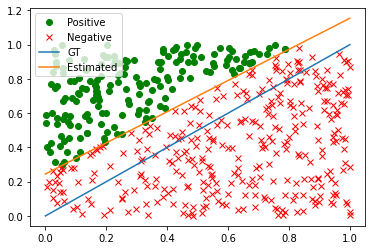

Qutting: Reached max iterations


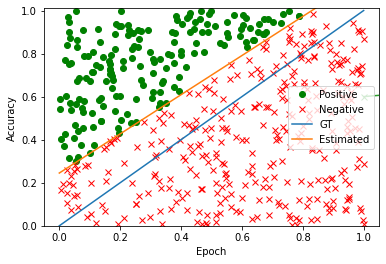

In [6]:
number_of_samples = 500
max_number_of_epochs = 10

X = np.random.rand(number_of_samples,2)
X = np.append(X, np.ones((X.shape[0],1)),axis = 1)

Y = X[:,1] > (X[:,0])
Y = np.float32(Y)
Y = Y.reshape((number_of_samples,1))

p = Perceptron(3)
p.train(X,Y,max_number_of_epochs)

In [7]:
p.history

[0.6, 0.72, 0.82, 0.836, 0.594, 0.792, 0.856, 0.526, 0.492, 0.834]

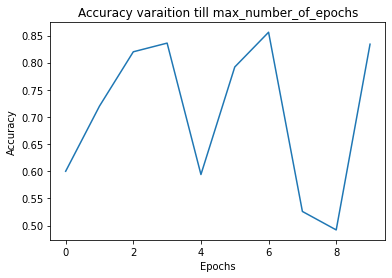

In [8]:
xx = np.arange(max_number_of_epochs)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy varaition till max_number_of_epochs")
plt.plot(xx, p.history)
plt.savefig("accuracy.png")

In [8]:
X[1].shape, p.w.shape

((3,), (3, 1))